In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [63]:
data = pd.read_csv("C:/Raisin_dataset.csv")

In [64]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [65]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [67]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

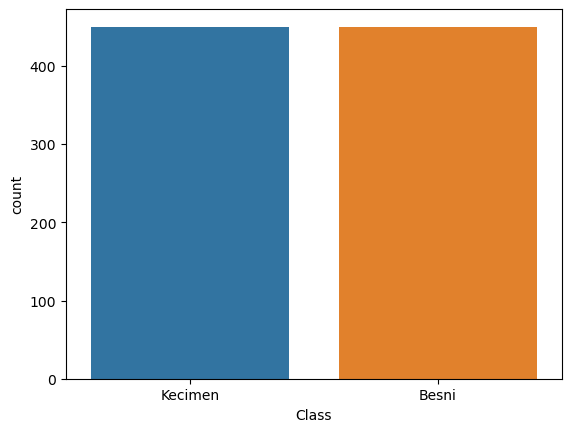

In [68]:
sns.countplot(data = data, x="Class")

plt.show()

In [69]:
X = data.iloc[:, :-1]
y = data.iloc[:, [-1]]

In [70]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [71]:
y

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [73]:
 Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [74]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [75]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                80        
                                                                 
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 2)                 14        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [76]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/100
23/23 [==============================] - 3s 33ms/step - loss: 3777.3545 - accuracy: 0.4903 - val_loss: 2096.6321 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 1236.2673 - accuracy: 0.4903 - val_loss: 117.2601 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 10.4166 - accuracy: 0.5111 - val_loss: 0.6903 - val_accuracy: 0.4667
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6943 - val_accuracy: 0.4611
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5097 - val_loss: 0.6942 - val_accuracy: 0.4611
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6943 - val_accuracy: 0.4611
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6943 - val_accuracy: 0

23/23 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 59/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 60/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6948 - val_accuracy: 0.4611
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 62/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6948 - val_accuracy: 0.4611
Epoch 63/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 64/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6948 - val_accuracy: 0.4611
Epoch 65/100
23

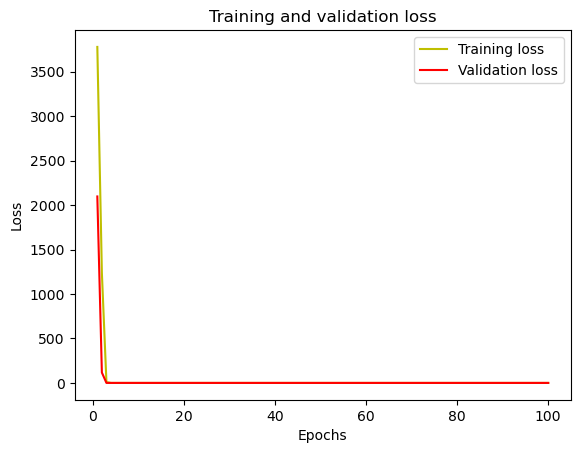

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

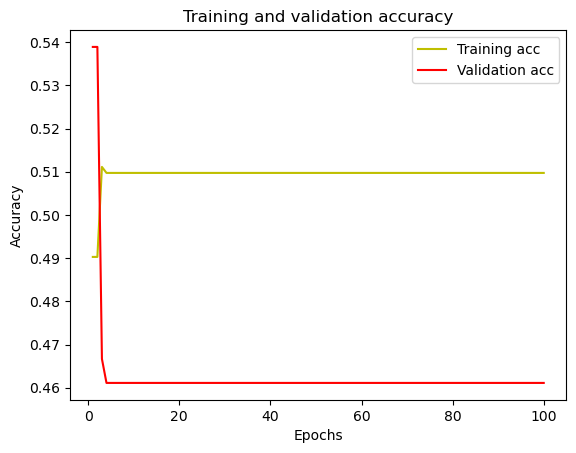

In [78]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
